### Simple Linear Regression
Involves only one independent variable used to predict the continuous dependent variable.



In [4]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Import linear regression
from sklearn.linear_model import LinearRegression

In [6]:
#Create a sample data ir room and its rent. Further convert it into a data frame
room = [1,2,3,4,5,6,7,8]
rent_of_house = [10000,14000,18000,23000,27000,34000,40000,45000]

In [7]:
#Dataframe
df = pd.DataFrame(list(zip(room,rent_of_house)),columns=['room','roh'])

In [8]:
df

,room,roh
0,1,10000
1,2,14000
2,3,18000
3,4,23000
4,5,27000
5,6,34000
6,7,40000
7,8,45000


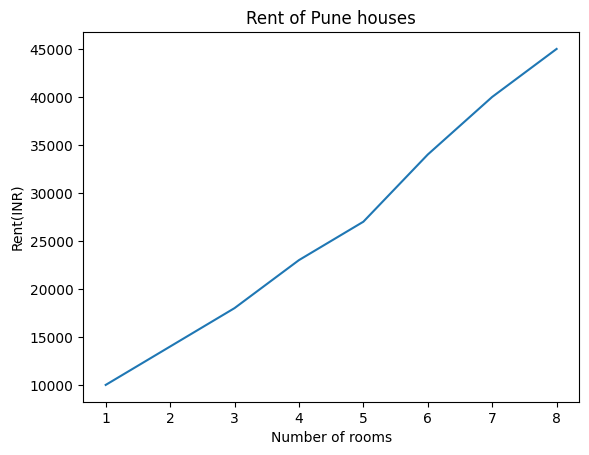

In [9]:
plt.plot(room,rent_of_house)

plt.title("Rent of Pune houses")

plt.xlabel("Number of rooms")

plt.ylabel("Rent(INR)")

plt.show()

In [10]:
#CORRELATION

df['room'].corr(df['roh'])

0.9960689121344174

In [11]:
X = np.array(room).reshape(-1,1)

In [12]:
Y = np.array(rent_of_house).reshape(-1,1)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X,Y)

LinearRegression()

In [15]:
test = 8
test = np.array(test).reshape(-1,1)

In [16]:
pred = model.predict(test)

In [17]:
print("Predicted Value: ",pred)

Predicted Value:  [[44166.66666667]]


In [18]:
Ypred = model.predict(X)
print(Ypred)

[[ 8583.33333333]
 [13666.66666667]
 [18750.        ]
 [23833.33333333]
 [28916.66666667]
 [34000.        ]
 [39083.33333333]
 [44166.66666667]]


In [19]:
Ypred_list = []

for rent in Ypred:
  Ypred_list.append(rent)

print(Ypred_list)

[array([8583.33333333]), array([13666.66666667]), array([18750.]), array([23833.33333333]), array([28916.66666667]), array([34000.]), array([39083.33333333]), array([44166.66666667])]


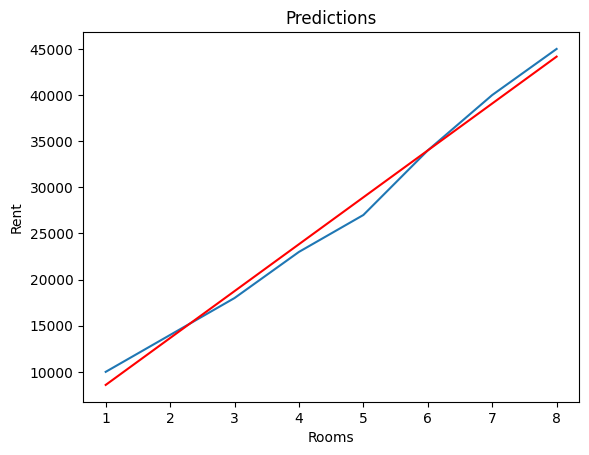

In [20]:
plt.plot(room,rent_of_house)

plt.plot(room,Ypred_list,color="red")

plt.title("Predictions")

plt.xlabel("Rooms")

plt.ylabel("Rent")

plt.show()

In [21]:
print("Coefficient of determination: {:.2f}".format(model.score(X,Y)))

Coefficient of determination: 0.99


### Multiple Linear Regression

Involves two or more independent variables used to predict the continuous dependent variable.




In [22]:
!pip install scikit-learn==1.1.3
from sklearn.datasets import load_boston

In [23]:
boston = load_boston()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [25]:
# Convert the data to a pandas dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [26]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [29]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [31]:
df.shape

(506, 14)

In [32]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

y= df['MEDV']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [49]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [55]:
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

R-squared score: 0.514966205186705


In [56]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 41.72457625585779


In [57]:
from math import sqrt

rmse = sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.45945634367613


In [59]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.935792084119305
